### **Predict Target Word**

- Là mô hình tạo ra embedding cho các từ (word).
- Dựa vào các từ xung quanh (context word), ta sẽ dự đoán ra chữ ở giữa.

In [76]:
data = ["he works at the factory","worker works at the factory"]
data

['he works at the factory', 'worker works at the factory']

Ta sẽ tạo ra mô hình, để khi truyền vào một từ (works) nó sẽ output ra xác xuất của từ (at) và (he) cao

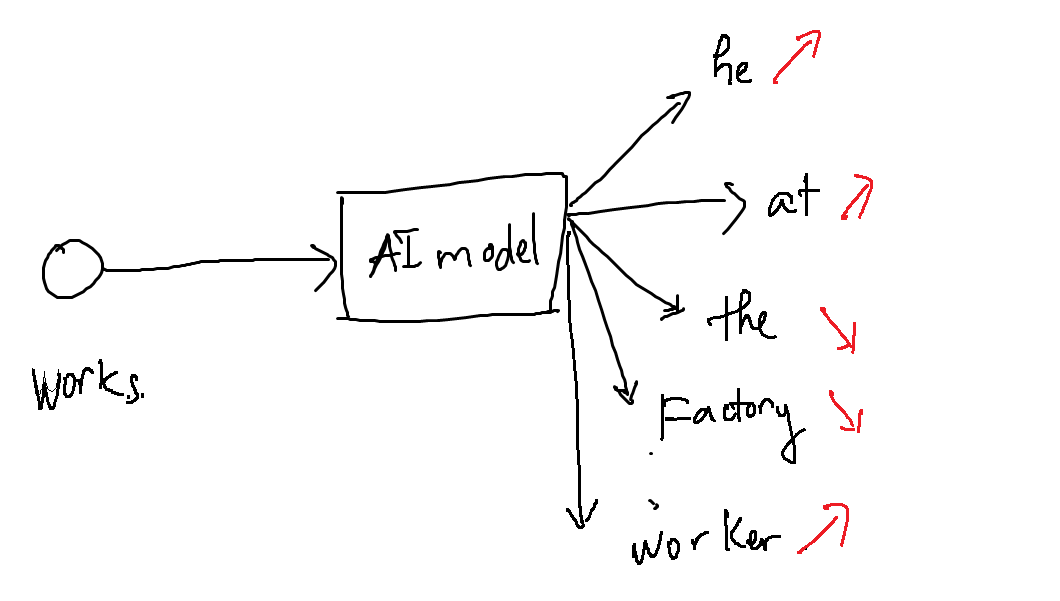

In [77]:
data_split = [["he", "works", "at", "the", "factory"],["worker", "works", "at", "the", "factory"]]
data_split

[['he', 'works', 'at', 'the', 'factory'],
 ['worker', 'works', 'at', 'the', 'factory']]

In [78]:
dictionary = ["he","works","at","the","factory","worker"]
dictionary

['he', 'works', 'at', 'the', 'factory', 'worker']

In [89]:
# Tạo ra tập data training cho model.
# Ví dụ: x là he, y là works. x là at, y là works
X_word = []
Y_word = []

window_size = 1
for row in data_split:
    for target_word_idx in range(len(row)):
        for context_word_idx in range(target_word_idx-window_size, target_word_idx+window_size+1):
            if context_word_idx <0:
                context_word_idx=0
            if context_word_idx != target_word_idx and context_word_idx<len(row):
                print("Target: ",row[target_word_idx],"\t\t Context: ", row[context_word_idx])
                X_word.append(row[target_word_idx])
                Y_word.append(row[context_word_idx])
                

Target:  he 		 Context:  works
Target:  works 		 Context:  he
Target:  works 		 Context:  at
Target:  at 		 Context:  works
Target:  at 		 Context:  the
Target:  the 		 Context:  at
Target:  the 		 Context:  factory
Target:  factory 		 Context:  the
Target:  worker 		 Context:  works
Target:  works 		 Context:  worker
Target:  works 		 Context:  at
Target:  at 		 Context:  works
Target:  at 		 Context:  the
Target:  the 		 Context:  at
Target:  the 		 Context:  factory
Target:  factory 		 Context:  the


### **Predict Next Word**

- Là mô hình tạo ra embedding cho các từ (word).
- Dựa vào từ mốc (target word), ta sẽ dự đoán ra chữ tiếp theo n giá trị (next words).

In [80]:
# # Tạo ra tập data training cho model.
# # Ví dụ: x là he, y là works. x là he, y là at
# X_word = []
# Y_word = []

# next_words = 2
# for row in data_split:
#     for target_word_idx in range(len(row)):
#         for next_word_idx in range(target_word_idx+1, target_word_idx+next_words+1):
#             if next_word_idx <len(row):
#                 print("Target: ",row[target_word_idx],"\t\t Next word: ", row[next_word_idx])
#                 X_word.append(row[next_word_idx])
#                 Y_word.append(row[target_word_idx])

In [87]:
# Convert các từ trong X_word và Y_word qua dạng onehot encoding
def word2onehot(word):
        word_vec = [0 for i in range(0, len(dictionary))]
        word_index = dictionary.index(word)
        word_vec[word_index] = 1
        return word_vec

word2onehot("works")

[0, 1, 0, 0, 0, 0]

In [90]:
for sample in zip(X_word, Y_word):
    print(sample)

('works', 'he')
('he', 'works')
('at', 'works')
('works', 'at')
('the', 'at')
('at', 'the')
('factory', 'the')
('the', 'factory')
('works', 'worker')
('worker', 'works')
('at', 'works')
('works', 'at')
('the', 'at')
('at', 'the')
('factory', 'the')
('the', 'factory')


In [85]:
Y_word

['works',
 'he',
 'at',
 'works',
 'the',
 'at',
 'factory',
 'the',
 'works',
 'worker',
 'at',
 'works',
 'the',
 'at',
 'factory',
 'the']

In [43]:
X_vec = [word2onehot(word) for word in X_word]
Y_vec = [word2onehot(word) for word in Y_word]
X_vec

[[0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0]]

In [44]:
import numpy as np
from sklearn.metrics import accuracy_score

class NetworkLayer:
    def __init__(self, numberOfInput, numberOfOutput, activation = None):
        """
        Initialize a network layer with random weights and bias.

        Parameters:
        numberOfInput (int): Number of input neurons of the layer.
        numberOfOutput (int): Number of output neurons of the layer.
        activation (str): Activation function of the layer (e.g., "RELU" for Rectified Linear Unit). Default is None.

        """
        self.weights = np.random.rand(numberOfInput,numberOfOutput) - 0.5
        self.bias = np.random.rand(1,numberOfOutput) - 0.5
        self.activation = activation

    def forward(self,priorForward):
        """
        Perform a forward pass through the network layer.

        Parameters:
        priorForward (numpy.ndarray): Input data for the layer.

        Returns:
        numpy.ndarray: Output result to be passed to the next layer.

        """
        self.input = priorForward
        self.linear = np.dot(priorForward,self.weights) + self.bias

        if self.activation == "RELU":
            return np.maximum(0,self.linear)
        elif self.activation == "softmax":
            exp_values = np.exp(self.linear - np.max(self.linear, axis=1, keepdims=True))
            return exp_values / np.sum(exp_values, axis=1, keepdims=True)
        else:
           return self.linear

    def backward(self, prior_d_loss,learningRate):
        """
        Perform a backward pass to update weights and bias and compute the loss output to pass to the previous layer.

        Parameters:
        priorLoss (numpy.ndarray): Input data for the layer.
        learningRate (float): Learning rate for weight and bias updates.

        Returns:
        numpy.ndarray: Loss gradient to be passed to the previous layer.

        """
        if self.activation == "RELU":
            prior_d_loss = prior_d_loss * ((self.linear > 0).astype(float))
        elif self.activation == "softmax":
            prior_d_loss = prior_d_loss  # For softmax, loss gradient remains unchanged
        self.weights -= (np.dot(self.input.T ,prior_d_loss) * learningRate)
        self.bias -= (np.sum(prior_d_loss)* learningRate)

        return np.dot(prior_d_loss,self.weights.T)
    
class Model:
    def __init__(self):
        """
        Initialize a neural network model.

        """
        self.layers = []
    def add(self, layer):
        """
        Add a network layer to the model.

        Parameters:
        layer (NetworkLayer): The layer to be added to the model.

        """
        self.layers.append(layer)
    def fit(self, data, expectedResults):
        """
        Set the training data and expected results for the model.

        Parameters:
        data (numpy.ndarray): Input training data.
        expectedResults (numpy.ndarray): Expected results for the training data.

        """
        self.data = data
        self.expectedResults = expectedResults
    def predict(self, input):
        output = input
        for i in range(len(self.layers)):
            output = self.layers[i].forward(output)
        return output
    def cross_entropy_loss(self,y_pred, y_true):
        """
        Calculate the cross-entropy loss.

        Parameters:
        y_pred (numpy.ndarray): Predicted probabilities for each class.
        y_true (numpy.ndarray): Actual class labels (one-hot encoded).

        Returns:
        float: Cross-entropy loss.
        """
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / m  # Add a small value to prevent log(0)
        return loss
    def create_batches(self, batch_size):
        """
        Create mini-batches from the training data.

        Parameters:
        batch_size (int): The size of each mini-batch.

        Returns:
        list: List of tuples (batch_data, batch_labels).
        """
        dataset = list(zip(self.data, self.expectedResults))
        np.random.shuffle(dataset)
        return [dataset[i:i + batch_size] for i in range(0, len(dataset), batch_size)]

    def train(self, epochs, learningRate, batch_size):
        """
        Train the model using the specified number of epochs, learning rate, and batch size.

        Parameters:
        epochs (int): Number of training epochs.
        learningRate (float): Learning rate for weight and bias updates.
        batch_size (int): Size of each mini-batch for training.
        """
        for epoch in range(epochs):
            batches = self.create_batches(batch_size)
            total_loss = 0
            total_accuracy = 0

            for batch in batches:
                batch_data, batch_labels = zip(*batch)
                batch_data = np.array(batch_data)
                batch_labels = np.array(batch_labels)

                # Forward pass
                output = batch_data
                for layer in self.layers:
                    output = layer.forward(output)

                # Calculate loss for the batch
                loss = self.cross_entropy_loss(output, batch_labels)
                total_loss += loss

                # Calculate accuracy for the batch
                pred_one_hot = np.zeros_like(output)
                pred_one_hot[np.arange(len(output)), output.argmax(1)] = 1
                total_accuracy+=accuracy_score(batch_labels, pred_one_hot)

                # Backward pass
                d_loss = (output - batch_labels) / batch_size
                for layer in reversed(self.layers):
                    d_loss = layer.backward(d_loss, learningRate)

            avg_loss = total_loss / len(batches)
            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {total_accuracy / len(batches):.4f}")
            print("--------")



In [45]:
EMBEDDING_SIZE = 5

In [49]:
model = Model()
model.add(NetworkLayer(len(dictionary),EMBEDDING_SIZE, activation="RELU"))
model.add(NetworkLayer(EMBEDDING_SIZE,len(dictionary),activation="softmax"))

model.fit(np.array(X_vec),np.array(Y_vec))
model.train(10000,0.05,batch_size=np.array(X_vec).shape[0])

Epoch 1/10000 - Loss: 1.8952 - Accuracy: 0.0000
--------
Epoch 2/10000 - Loss: 1.8900 - Accuracy: 0.0000
--------
Epoch 3/10000 - Loss: 1.8852 - Accuracy: 0.0000
--------
Epoch 4/10000 - Loss: 1.8809 - Accuracy: 0.0000
--------
Epoch 5/10000 - Loss: 1.8772 - Accuracy: 0.0000
--------
Epoch 6/10000 - Loss: 1.8739 - Accuracy: 0.0000
--------
Epoch 7/10000 - Loss: 1.8709 - Accuracy: 0.0000
--------
Epoch 8/10000 - Loss: 1.8681 - Accuracy: 0.0000
--------
Epoch 9/10000 - Loss: 1.8653 - Accuracy: 0.0000
--------
Epoch 10/10000 - Loss: 1.8627 - Accuracy: 0.0000
--------
Epoch 11/10000 - Loss: 1.8602 - Accuracy: 0.0000
--------
Epoch 12/10000 - Loss: 1.8578 - Accuracy: 0.0000
--------
Epoch 13/10000 - Loss: 1.8554 - Accuracy: 0.0000
--------
Epoch 14/10000 - Loss: 1.8532 - Accuracy: 0.0000
--------
Epoch 15/10000 - Loss: 1.8510 - Accuracy: 0.0000
--------
Epoch 16/10000 - Loss: 1.8488 - Accuracy: 0.0000
--------
Epoch 17/10000 - Loss: 1.8467 - Accuracy: 0.0000
--------
Epoch 18/10000 - Loss: 

### **Get the embedding features**

In [ ]:
word_1 = "he"


In [50]:
word_1 = "he"
word_2 = "worker"

X_vec_1 = word2onehot(word_1)
X_vec_2 = word2onehot(word_2)

emb_1 = model.layers[0].forward(X_vec_1)
emb_2 = model.layers[0].forward(X_vec_2)


print(emb_1, emb_2)

[[1.45695321 2.31076863 1.82609811 2.27675527 1.63006587]] [[1.28595041 2.37817756 1.73801789 1.71419849 1.80603907]]


In [51]:
from sklearn.metrics.pairwise import cosine_similarity

print("Cosine similairity before training: ", cosine_similarity([X_vec_1], [X_vec_2]))
print("Cosine similairity after training: ", cosine_similarity(emb_1, emb_2))

Cosine similairity before training:  [[0.]]
Cosine similairity after training:  [[0.99071969]]


C:\Users\Latiude 7480\AppData\Local\Temp\ipykernel_18948\1223134389.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity_matrix[i][j] = similarity
C:\Users\Latiude 7480\AppData\Local\Temp\ipykernel_18948\1223134389.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity_matrix[i][j] = similarity
C:\Users\Latiude 7480\AppData\Local\Temp\ipykernel_18948\1223134389.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity_matrix[i][j] = simila

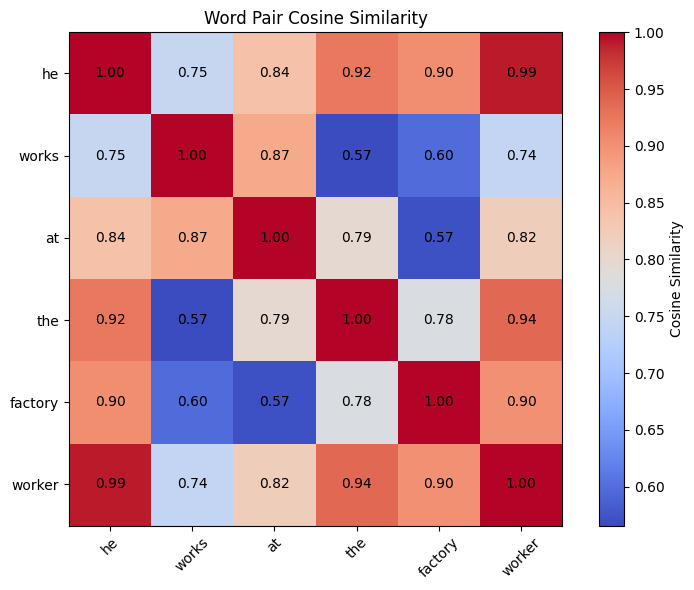

In [52]:
import matplotlib.pyplot as plt

# Draw the pairwise cosine similarity word
similarity_matrix = np.zeros((len(dictionary), len(dictionary)))

for i, word1 in enumerate(dictionary):
    for j, word2 in enumerate(dictionary):
        if i != j:
            X_vec_1 = word2onehot(word1)
            X_vec_2 = word2onehot(word2)

            emb_1 = model.layers[0].forward(X_vec_1)
            emb_2 = model.layers[0].forward(X_vec_2)


            similarity = cosine_similarity(emb_1, emb_2)
            similarity_matrix[i][j] = similarity
        else:
            similarity_matrix[i][j] = 1

plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap="coolwarm", interpolation="nearest")

# Set axis labels and tick marks
plt.xticks(np.arange(len(dictionary)), dictionary, rotation=45)
plt.yticks(np.arange(len(dictionary)), dictionary)

# Display actual values in each cell
for i in range(len(dictionary)):
    for j in range(len(dictionary)):
        plt.text(j, i, f"{similarity_matrix[i, j]:.2f}", ha="center", va="center", color="black")

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label("Cosine Similarity")

# Show the plot
plt.title("Word Pair Cosine Similarity")
plt.tight_layout()
plt.show()

### **Trying train on the big data**

In [56]:
# Data preprocessing
# 1. Remove all the symbols in the corpus
# 2. Convert into lowercase 

import re

def preprocess_text(text):
    # Remove symbols and special characters using regular expressions
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters (keeps spaces)
    
    # Convert text to lowercase
    text = text.lower()
    
    return text

data_org = open("fairy_tales.txt").read()


In [60]:
preprocessed_data = preprocess_text(data_org)
print(preprocessed_data[0:100])

the happy prince
high above the city on a tall column stood the statue of the happy prince  he was g


In [59]:
len(preprocessed_data)

19667410

In [65]:
rows = preprocessed_data.split("\n")
print(len(rows))

91761


In [69]:
data_split = [row.split(" ") for row in rows]
print(len(data_split))

91761


In [70]:
# Select predicting target word
# Tạo ra tập data training cho model.
# Ví dụ: x là he, y là works. x là at, y là works
X_word = []
Y_word = []

window_size = 5
for row in data_split:
    for target_word_idx in range(len(row)):
        for context_word_idx in range(target_word_idx-window_size, target_word_idx+window_size+1):
            if context_word_idx <0:
                context_word_idx=0
            if context_word_idx != target_word_idx and context_word_idx<len(row):
                X_word.append(row[context_word_idx])
                Y_word.append(row[context_word_idx])
                

In [71]:
len(X_word)

36725985

In [74]:
class ModelTrainByStep:
    def __init__(self):
        """
        Initialize a neural network model.

        """
        self.layers = []
    def add(self, layer):
        """
        Add a network layer to the model.

        Parameters:
        layer (NetworkLayer): The layer to be added to the model.

        """
        self.layers.append(layer)
    def fit(self, data, expectedResults):
        """
        Set the training data and expected results for the model.

        Parameters:
        data (numpy.ndarray): Input training data.
        expectedResults (numpy.ndarray): Expected results for the training data.

        """
        self.data = data
        self.expectedResults = expectedResults
    def predict(self, input):
        output = input
        for i in range(len(self.layers)):
            output = self.layers[i].forward(output)
        return output
    def cross_entropy_loss(self,y_pred, y_true):
        """
        Calculate the cross-entropy loss.

        Parameters:
        y_pred (numpy.ndarray): Predicted probabilities for each class.
        y_true (numpy.ndarray): Actual class labels (one-hot encoded).

        Returns:
        float: Cross-entropy loss.
        """
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / m  # Add a small value to prevent log(0)
        return loss
    def create_batches(self, batch_size):
        """
        Create mini-batches from the training data.

        Parameters:
        batch_size (int): The size of each mini-batch.

        Returns:
        list: List of tuples (batch_data, batch_labels).
        """
        dataset = list(zip(self.data, self.expectedResults))
        np.random.shuffle(dataset)
        return [dataset[i:i + batch_size] for i in range(0, len(dataset), batch_size)]

    def train(self, epochs, learningRate, batch_size, number_step):
        """
        Train the model using the specified number of epochs, learning rate, batch size and number step.

        Parameters:
        epochs (int): Number of training epochs.
        learningRate (float): Learning rate for weight and bias updates.
        batch_size (int): Size of each mini-batch for training.
        number_step (int): Number of step training on one epoch.
        """
        for epoch in range(epochs):
            batches = self.create_batches(batch_size)
            total_loss = 0
            total_accuracy = 0

            for batch in batches:
                batch_data, batch_labels = zip(*batch)
                batch_data = np.array(batch_data)
                batch_labels = np.array(batch_labels)

                # Forward pass
                output = batch_data
                for layer in self.layers:
                    output = layer.forward(output)

                # Calculate loss for the batch
                loss = self.cross_entropy_loss(output, batch_labels)
                total_loss += loss

                # Calculate accuracy for the batch
                pred_one_hot = np.zeros_like(output)
                pred_one_hot[np.arange(len(output)), output.argmax(1)] = 1
                total_accuracy+=accuracy_score(batch_labels, pred_one_hot)

                # Backward pass
                d_loss = (output - batch_labels) / batch_size
                for layer in reversed(self.layers):
                    d_loss = layer.backward(d_loss, learningRate)

            avg_loss = total_loss / len(batches)
            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {total_accuracy / len(batches):.4f}")
            print("--------")

  0%|          | 0/36725985 [00:00<?, ?it/s]

  0%|          | 2371/36725985 [01:01<314:06:12, 32.48it/s]

KeyboardInterrupt: 

  0%|          | 2371/36725985 [01:20<314:06:12, 32.48it/s]

In [72]:
len(dictionary)

115175

In [ ]:
EMBEDDING_SIZE = 512

model = ModelTrainByStep()
model.add(NetworkLayer(len(dictionary),EMBEDDING_SIZE, activation="RELU"))
model.add(NetworkLayer(EMBEDDING_SIZE,len(dictionary),activation="softmax"))

model.fit(np.array(X_vec),np.array(Y_vec))
model.train(10000,0.01,batch_size=np.array(X_vec).shape[0])